In [32]:
import yfinance as yf
import mplfinance as mpf
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd


In [118]:
start = datetime(2025, 9, 1)
end = datetime(2025, 9 ,15)

In [119]:
# tic1 = 'AIRE'
tic = 'JPY=X'
data = yf.download(tic, start=start, end=end)

print(data.tail(15))
print(len(data))

C:\Users\oosode.Oos\AppData\Local\Temp\ipykernel_28600\3843604327.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tic, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open Volume
Ticker           JPY=X       JPY=X       JPY=X       JPY=X  JPY=X
Date                                                             
2025-09-01  147.097000  147.371002  146.789001  147.097000      0
2025-09-02  147.084000  148.932999  147.093002  147.084000      0
2025-09-03  148.548004  149.115997  147.953003  148.548004      0
2025-09-04  147.979996  148.770004  147.839005  147.979996      0
2025-09-05  148.375000  148.427994  146.824005  148.375000      0
2025-09-08  148.343994  148.546005  147.470993  148.343994      0
2025-09-09  147.363998  147.414993  146.326996  147.363998      0
2025-09-10  147.391998  147.595993  147.128006  147.391998      0
2025-09-11  147.332001  147.981995  147.005997  147.332001      0
2025-09-12  147.223999  148.052002  147.167999  147.223999      0
10


In [120]:
print('OG data')
print(data.info())
print('\nFirst few rows')
print(data.head())
print(data.columns.tolist())

OG data
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2025-09-01 to 2025-09-12
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, JPY=X)   10 non-null     float64
 1   (High, JPY=X)    10 non-null     float64
 2   (Low, JPY=X)     10 non-null     float64
 3   (Open, JPY=X)    10 non-null     float64
 4   (Volume, JPY=X)  10 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 480.0 bytes
None

First few rows
Price            Close        High         Low        Open Volume
Ticker           JPY=X       JPY=X       JPY=X       JPY=X  JPY=X
Date                                                             
2025-09-01  147.097000  147.371002  146.789001  147.097000      0
2025-09-02  147.084000  148.932999  147.093002  147.084000      0
2025-09-03  148.548004  149.115997  147.953003  148.548004      0
2025-09-04  147.979996  148.770004  147.839005  147.979996      0
2025-09-05

In [121]:
#checking for mssing values
print(f'\n Missing values in each column:')
print(data.isnull().sum())


 Missing values in each column:
Price   Ticker
Close   JPY=X     0
High    JPY=X     0
Low     JPY=X     0
Open    JPY=X     0
Volume  JPY=X     0
dtype: int64


In [122]:
data.columns = data.columns.droplevel(1) # to remove ticker lvl
print(f'\nColumns after fixing: {data.columns.tolist()}')


Columns after fixing: ['Close', 'High', 'Low', 'Open', 'Volume']


In [123]:
#clean and prepare das data
data_clean = data.dropna(subset=['Open', 'High', 'Low','Close']).copy()

In [124]:
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    data_clean[col] = pd.to_numeric(data_clean[col], errors='coerce')

In [125]:
#drop remaining nan values
data_clean=data_clean.dropna()

In [126]:
print(f'\nFinal data shape: {data_clean.shape}')
print('\nFirst few rows of cleaned data')
print(data_clean.head())


Final data shape: (10, 5)

First few rows of cleaned data
Price            Close        High         Low        Open  Volume
Date                                                              
2025-09-01  147.097000  147.371002  146.789001  147.097000       0
2025-09-02  147.084000  148.932999  147.093002  147.084000       0
2025-09-03  148.548004  149.115997  147.953003  148.548004       0
2025-09-04  147.979996  148.770004  147.839005  147.979996       0
2025-09-05  148.375000  148.427994  146.824005  148.375000       0


c:\Users\oosode.Oos\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


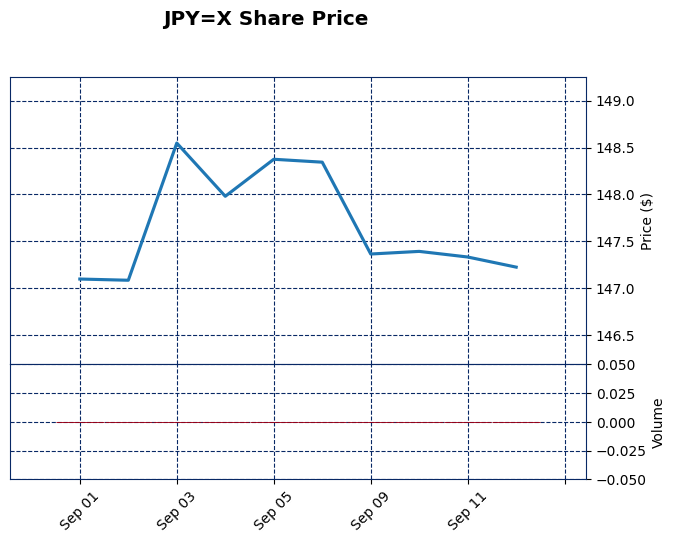

In [133]:
mpf.plot(data_clean,
         type='line',
         volume=True,
         style='sas',
         title=f'{tic} Share Price',
         ylabel='Price ($)',
         ylabel_lower='Volume',
         mav=(10,20),
         show_nontrading=False)

In [128]:
mpf.plot(data_clean,
         type='candle',
         volume=True,
         style='charles',
         title=f'{tic} Share Price',
         ylabel='Price ($)',
         ylabel_lower='Volume',
         mav=(20,50),
         show_nontrading=False,
         savefig='high_quality_chart.png',  
         figratio=(12, 8),  # for a  wider figure
         figscale=1.2)      # For a larger scale

c:\Users\oosode.Oos\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


c:\Users\oosode.Oos\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


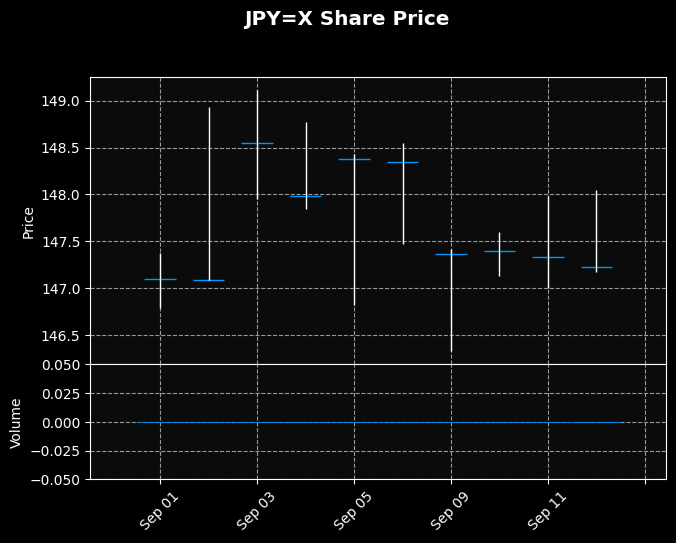

In [129]:

mpf.plot(data_clean,
         type='candle',
         volume=True,
         style='nightclouds',  # different stylez ~ 'charles', 'mike', 'nightclouds', 'brasil', 'binance', 'yahoo'
         title=f'{tic} Share Price',
         mav=(20,50))

In [130]:
# mpf.plot(data_clean,
#          type='candle',
#          volume=True,
#          style='charles',
#          title=f'{tic} with RSI',
#          mav=(20,50),
#          addplot=mpf.make_addplot(rsi_data, panel=2, color='purple'))  # Add RSI panel

C:\Users\oosode.Oos\AppData\Local\Temp\ipykernel_28600\3032170915.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = data_clean.last('10D')  # Last 60 days
c:\Users\oosode.Oos\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


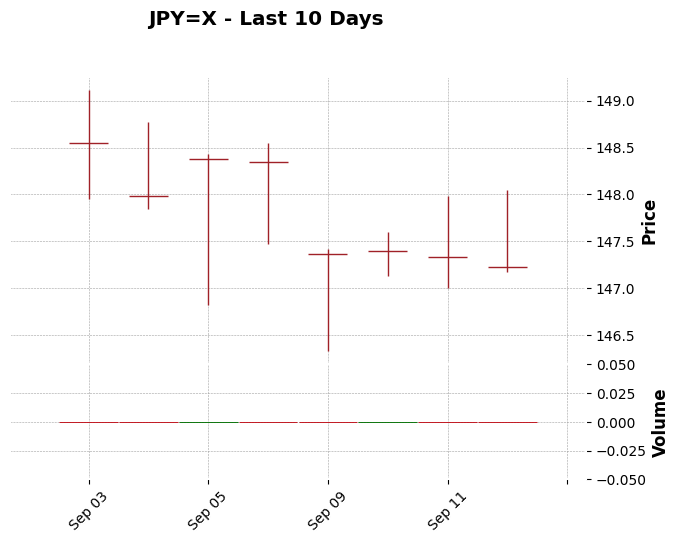

In [131]:
# Plot only recent data
recent_data = data_clean.last('10D')  # Last 60 days
mpf.plot(recent_data,
         type='candle',
         volume=True,
         style='charles',
         title=f'{tic} - Last 10 Days')